In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math, random

In [2]:
data = pd.read_csv("pollution_2000_2021.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [12]:
numeric_data = data.iloc[:,8:]
numeric_data.head(5)
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   O3 Mean            608699 non-null  float64
 1   O3 1st Max Value   608699 non-null  float64
 2   O3 1st Max Hour    608699 non-null  int64  
 3   O3 AQI             608699 non-null  int64  
 4   CO Mean            608699 non-null  float64
 5   CO 1st Max Value   608699 non-null  float64
 6   CO 1st Max Hour    608699 non-null  int64  
 7   CO AQI             608699 non-null  float64
 8   SO2 Mean           608699 non-null  float64
 9   SO2 1st Max Value  608699 non-null  float64
 10  SO2 1st Max Hour   608699 non-null  int64  
 11  SO2 AQI            608699 non-null  float64
 12  NO2 Mean           608699 non-null  float64
 13  NO2 1st Max Value  608699 non-null  float64
 14  NO2 1st Max Hour   608699 non-null  int64  
 15  NO2 AQI            608699 non-null  int64  
dtypes:

In [15]:
numeric_data = numeric_data.rename(columns=
                                   {"O3 Mean":"o3mean","O3 1st Max Value":"o3firstMax",
                                   "O3 1st Max Hour":"o3firstMaxHour" , "O3 AQI":"o3aqi",
                                   "CO Mean":"comean","CO 1st Max Value":"cofirstMax",
                                   "CO 1st Max Hour":"cofirstMaxHour" , "CO AQI":"coaqi",
                                   "SO2 Mean":"so2mean","SO2 1st Max Value":"so2firstMax",
                                   "SO2 1st Max Hour":"so2firstMaxHour" , "SO2 AQI":"so2aqi",
                                   "NO2 Mean":"no2mean","NO2 1st Max Value":"no2firstMax",
                                   "NO2 1st Max Hour":"no2firstMaxHour" , "NO2 AQI":"no2aqi"})
numeric_data

,o3mean,o3firstMax,o3firstMaxHour,o3aqi,comean,cofirstMax,cofirstMaxHour,coaqi,so2mean,so2firstMax,so2firstMaxHour,so2aqi,no2mean,no2firstMax,no2firstMaxHour,no2aqi
0,0.019765,0.040,10,37,0.878947,2.2,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,0.015882,0.032,10,30,1.066667,2.3,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,0.009353,0.016,9,15,1.762500,2.5,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,0.015882,0.033,9,31,1.829167,3.0,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,0.007353,0.012,9,11,2.700000,3.7,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608694,0.040588,0.049,10,45,0.100000,0.1,0,1.0,0.409091,0.7,2,0.0,1.281818,2.1,0,2
608695,0.037882,0.042,10,39,0.100000,0.1,0,1.0,0.325000,0.4,4,0.0,1.104167,2.3,20,2
608696,0.039765,0.050,9,46,0.100000,0.1,0,1.0,0.326087,0.5,2,0.0,1.678261,5.8,23,5
608697,0.049176,0.058,10,61,0.066667,0.1,0,1.0,0.317391,0.5,20,0.0,2.934783,7.4,0,7


In [17]:
numeric_data.corr()

,o3mean,o3firstMax,o3firstMaxHour,o3aqi,comean,cofirstMax,cofirstMaxHour,coaqi,so2mean,so2firstMax,so2firstMaxHour,so2aqi,no2mean,no2firstMax,no2firstMaxHour,no2aqi
o3mean,1.000000,0.888491,0.021535,0.793831,-0.272808,-0.301420,-0.234468,-0.302746,-0.085892,-0.043578,-0.074411,-0.046879,-0.354081,-0.223445,-0.248754,-0.223392
o3firstMax,0.888491,1.000000,-0.064157,0.929871,-0.150819,-0.156256,-0.096389,-0.154462,-0.016622,0.027497,-0.009159,0.028160,-0.130065,0.024540,-0.097191,0.024670
o3firstMaxHour,0.021535,-0.064157,1.000000,-0.049191,-0.007070,-0.023887,-0.065228,-0.023629,0.022992,0.017469,-0.034690,0.018704,-0.003084,-0.033599,-0.110127,-0.033424
o3aqi,0.793831,0.929871,-0.049191,1.000000,-0.083792,-0.092295,-0.066548,-0.089874,0.039731,0.067416,0.006828,0.070419,-0.041468,0.080660,-0.089856,0.081186
comean,-0.272808,-0.150819,-0.007070,-0.083792,1.000000,0.938924,0.123496,0.938487,0.252760,0.180602,0.035905,0.195396,0.636867,0.553802,0.040552,0.557132
cofirstMax,-0.301420,-0.156256,-0.023887,-0.092295,0.938924,1.000000,0.197842,0.997994,0.239343,0.177612,0.052147,0.191871,0.665750,0.610007,0.059050,0.613150
cofirstMaxHour,-0.234468,-0.096389,-0.065228,-0.066548,0.123496,0.197842,1.000000,0.202759,0.091580,0.074302,0.150519,0.079407,0.249937,0.294573,0.301077,0.294722
coaqi,-0.302746,-0.154462,-0.023629,-0.089874,0.938487,0.997994,0.202759,1.000000,0.242693,0.181139,0.052843,0.195639,0.670948,0.616797,0.059479,0.619954
so2mean,-0.085892,-0.016622,0.022992,0.039731,0.252760,0.239343,0.091580,0.242693,1.000000,0.824596,0.117148,0.838229,0.364752,0.318863,0.030139,0.323621
so2firstMax,-0.043578,0.027497,0.017469,0.067416,0.180602,0.177612,0.074302,0.181139,0.824596,1.000000,0.142861,0.988289,0.299196,0.280911,0.023897,0.285097


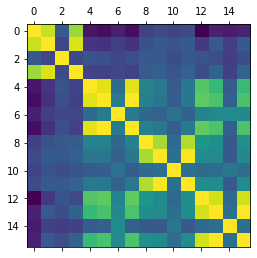

In [20]:
plt.matshow(numeric_data.corr(), 1)

In [21]:
numeric_data.corr()

,o3mean,o3firstMax,o3firstMaxHour,o3aqi,comean,cofirstMax,cofirstMaxHour,coaqi,so2mean,so2firstMax,so2firstMaxHour,so2aqi,no2mean,no2firstMax,no2firstMaxHour,no2aqi
o3mean,1.000000,0.888491,0.021535,0.793831,-0.272808,-0.301420,-0.234468,-0.302746,-0.085892,-0.043578,-0.074411,-0.046879,-0.354081,-0.223445,-0.248754,-0.223392
o3firstMax,0.888491,1.000000,-0.064157,0.929871,-0.150819,-0.156256,-0.096389,-0.154462,-0.016622,0.027497,-0.009159,0.028160,-0.130065,0.024540,-0.097191,0.024670
o3firstMaxHour,0.021535,-0.064157,1.000000,-0.049191,-0.007070,-0.023887,-0.065228,-0.023629,0.022992,0.017469,-0.034690,0.018704,-0.003084,-0.033599,-0.110127,-0.033424
o3aqi,0.793831,0.929871,-0.049191,1.000000,-0.083792,-0.092295,-0.066548,-0.089874,0.039731,0.067416,0.006828,0.070419,-0.041468,0.080660,-0.089856,0.081186
comean,-0.272808,-0.150819,-0.007070,-0.083792,1.000000,0.938924,0.123496,0.938487,0.252760,0.180602,0.035905,0.195396,0.636867,0.553802,0.040552,0.557132
cofirstMax,-0.301420,-0.156256,-0.023887,-0.092295,0.938924,1.000000,0.197842,0.997994,0.239343,0.177612,0.052147,0.191871,0.665750,0.610007,0.059050,0.613150
cofirstMaxHour,-0.234468,-0.096389,-0.065228,-0.066548,0.123496,0.197842,1.000000,0.202759,0.091580,0.074302,0.150519,0.079407,0.249937,0.294573,0.301077,0.294722
coaqi,-0.302746,-0.154462,-0.023629,-0.089874,0.938487,0.997994,0.202759,1.000000,0.242693,0.181139,0.052843,0.195639,0.670948,0.616797,0.059479,0.619954
so2mean,-0.085892,-0.016622,0.022992,0.039731,0.252760,0.239343,0.091580,0.242693,1.000000,0.824596,0.117148,0.838229,0.364752,0.318863,0.030139,0.323621
so2firstMax,-0.043578,0.027497,0.017469,0.067416,0.180602,0.177612,0.074302,0.181139,0.824596,1.000000,0.142861,0.988289,0.299196,0.280911,0.023897,0.285097


In [23]:
plt.boxplot(numeric_data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018E39D49CA8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.hist(numeric_data)

In [27]:
a = [2,3,2]

In [33]:
np.sum(a,a)

TypeError: 'list' object cannot be interpreted as an integer